# Problem 2.61
One way to obtain the allowed energies of a potential well numerically is to turn the Schrödinger equation into a matrix equation, by discretizing the variable x. Slice the relevant interval at evenly spaced points.

$$
-\lambda \psi_{j-1} + (2\lambda + V_j)\psi - \lambda \psi_{j-1} = E\psi_j, \lambda = \frac{\hbar^2}{2m(\Delta x)^2}
$$

In [1]:
# Create Hamiltonian Matrix
import numpy as np
import scipy.sparse.linalg as sp
def create_hamiltonian(dimension, end_point=0):
    x_naught = 0.
    x_end    = end_point
    delta_x  = end_point/(dimension+1)
    potential_well = 0. # Always zero inside the well

    # Let hbar = 1, m = 1.
    ham_mat = np.zeros((dimension,dimension), float)
    np.fill_diagonal(ham_mat[:,1:], -1)
    np.fill_diagonal(ham_mat, 2)
    np.fill_diagonal(ham_mat[1:], -1)
    
    # Use scipy eigs function
    w, v = sp.eigs(ham_mat, k=3, which='SR', return_eigenvectors=True)
    return (w,v)


# Using the create_hamilitonian Method
The above code discretizes the Schr&ouml;dinger equation and calculates the hamilitonian. From there, we can extract the eigenvalues and eigenvectors to retrieve the energy levels

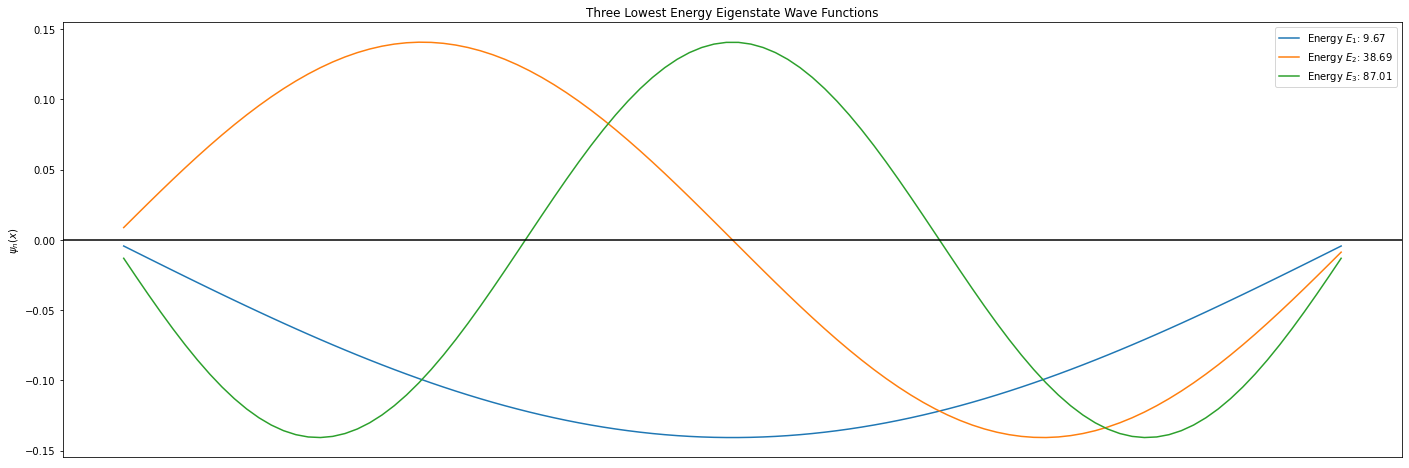

In [2]:
import matplotlib.pyplot as plt
value, vector = create_hamiltonian(100)

plt.figure(figsize=(24,8))

# Plot each eigenstate
for n in range(1,4):
    plt.plot(vector.real[:, n-1], label=fr'Energy $E_{n}$: {100**2*value.real[n-1]:.2f}')

plt.xticks([])
plt.ylabel(r'$\psi_n(x)$')
plt.axhline(0, c='black')
plt.title("Three Lowest Energy Eigenstate Wave Functions")
plt.legend()
plt.show()